# Example to load Point Clouds
In this example only the point clouds are loaded. This fastens the approach but obviously has not all interesting.

In [ ]:
import os
import matplotlib.pyplot as plt

# Change the working directory to main directory in order to import the modules.
os.chdir('../')

In [2]:
from src.dataset import FEMGraphDataset, LoadType
from src.utils import load_config

In [3]:
config_file_path = 'config.yaml'

# Get the config  
config = load_config(config_file_path)
dataset_config = config['dataset']
base_dir = dataset_config['base_dir']

# Load the specific data from dataset
geometries = ['blank', 'punch', 'binder','die'] # Can be any unique subset of this list.
timesteps = [0, 1, 2] #Tiemsteps must be a list of integers. Timesteps available is [0, 1, 2]
load_type = LoadType.NODES


In [4]:
# Access dataset
dataset = FEMGraphDataset(
    base_dir=base_dir,
    geometries=geometries,
    timesteps=timesteps,
    load_type=load_type
)

# Total information
print("Dataset size:", len(dataset))

Dataset size: 5338


# Display the Point Cloud

In [5]:
# Information per simulation.
(parameters, point_clouds)  = dataset[0]

for geometry, pc in zip(geometries, point_clouds):
    print(f"{geometry} shape: {pc.shape}")

blank shape: torch.Size([3, 11236, 3])
punch shape: torch.Size([3, 1000, 3])
binder shape: torch.Size([3, 127, 3])
die shape: torch.Size([3, 1696, 3])


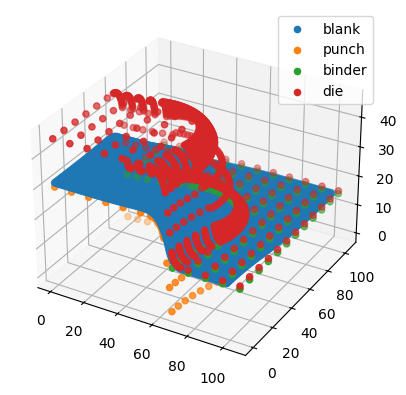

In [16]:
fig = plt.subplot(projection='3d')
timestep = 1

for geometry, pc in zip(geometries, point_clouds):
    
    X, Y, Z = pc[timestep][:,0], pc[timestep][:,1], pc[timestep][:,2]
    fig.scatter3D(X,Y,Z, label=geometry)

plt.legend()
plt.show()